In [34]:
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import SpectralEmbedding
import numpy as np
import pandas as pd
import os
import seaborn as sns
import scanpy.external as sce
import omicverse as ov
import cospar as cs

In [2]:
adata = sc.read_h5ad('/data/jiangjunyao/polyATAC/cospar_tuning/SPD.h5ad')

In [77]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [6,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300

%matplotlib inline

In [83]:
adata.obs.to_csv('/data/jiangjunyao/polyATAC/nmp_final/1009_SPD_[20, 15, 10]_0.2_analyzed.csv')

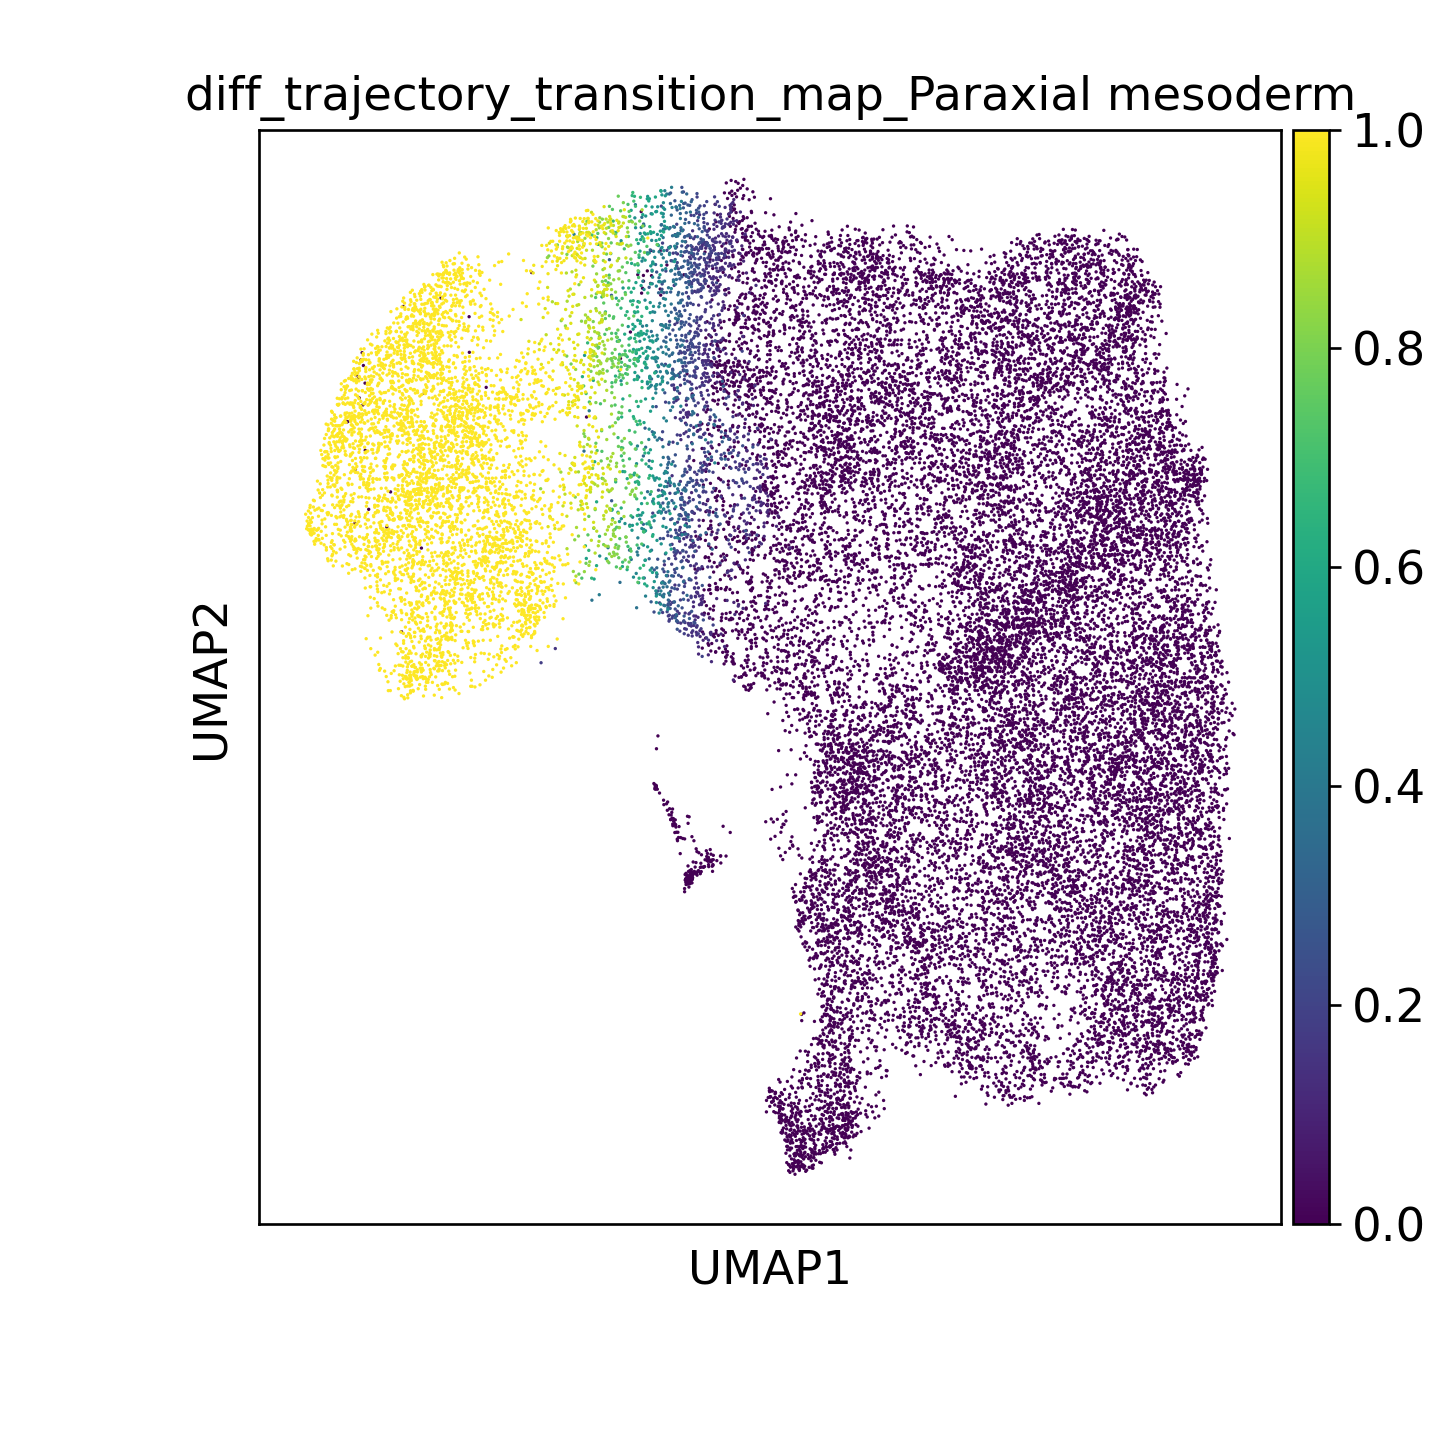

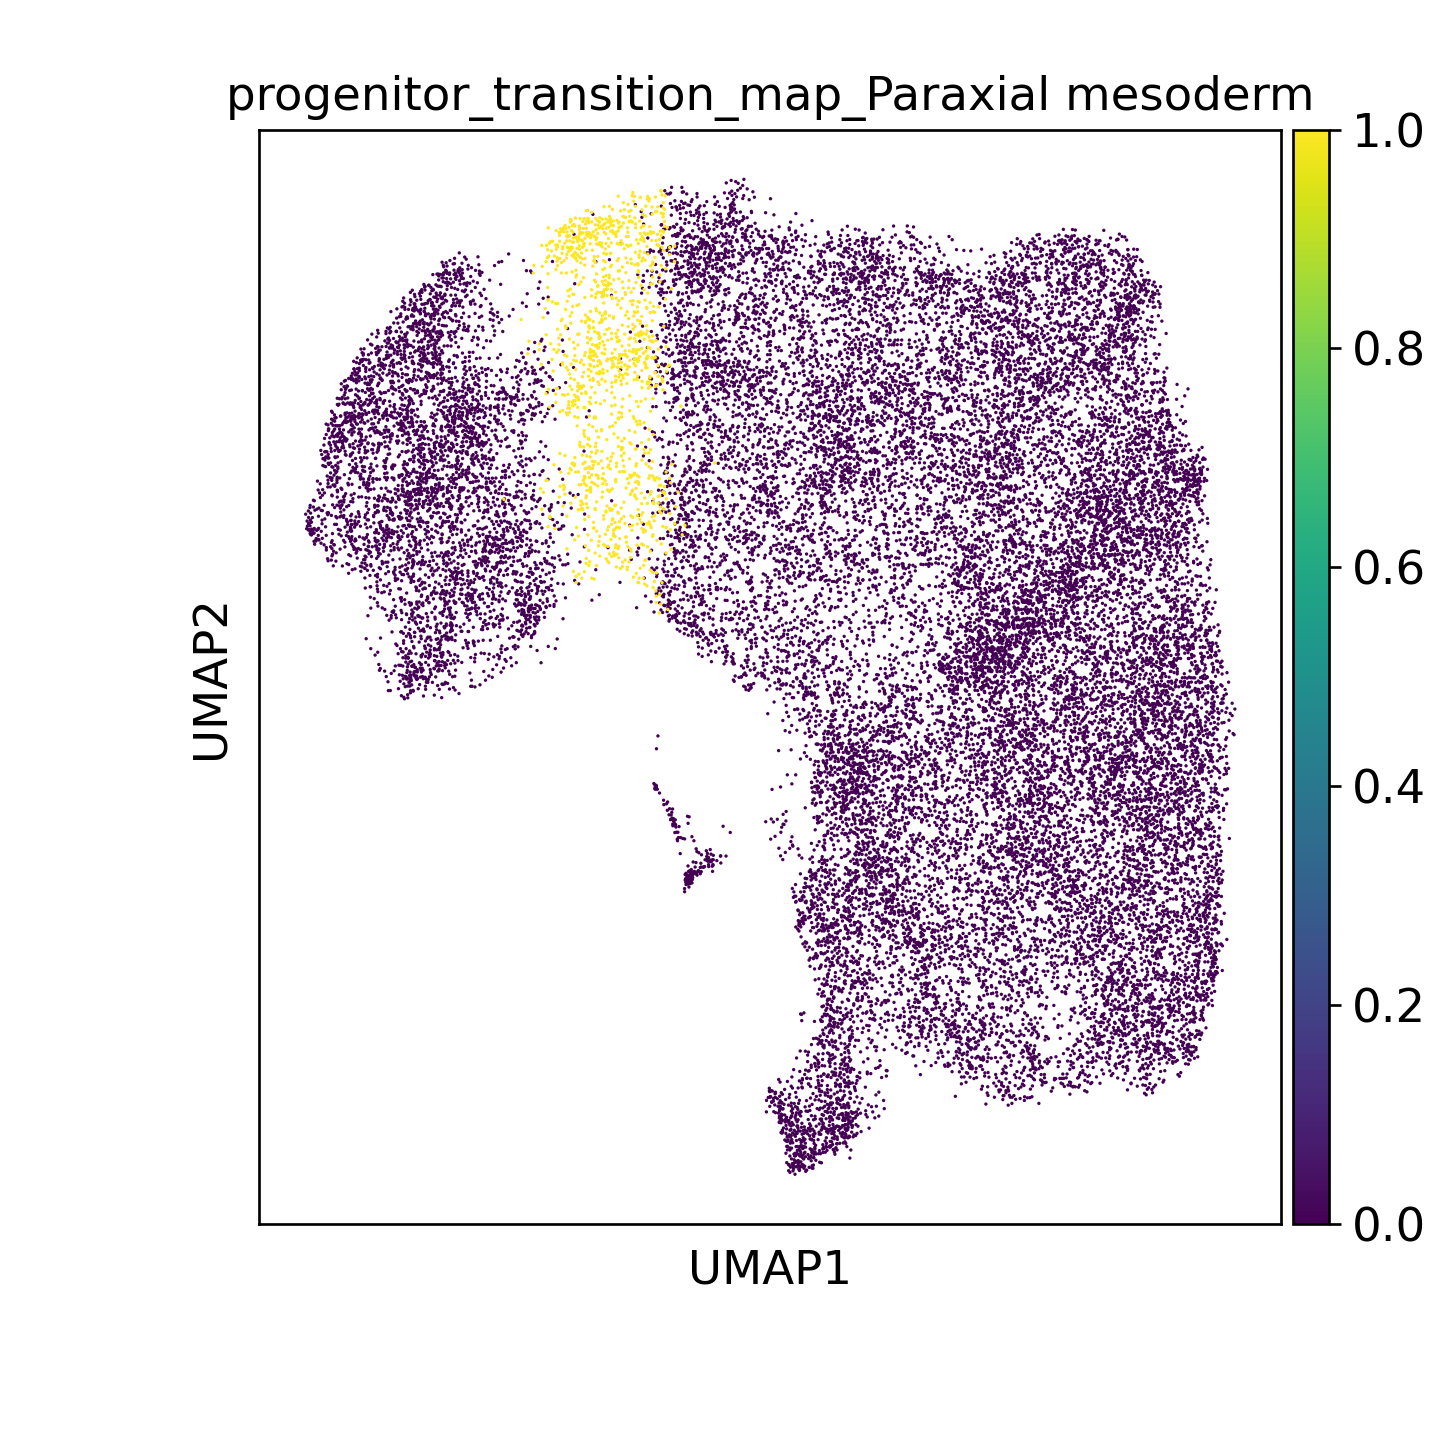

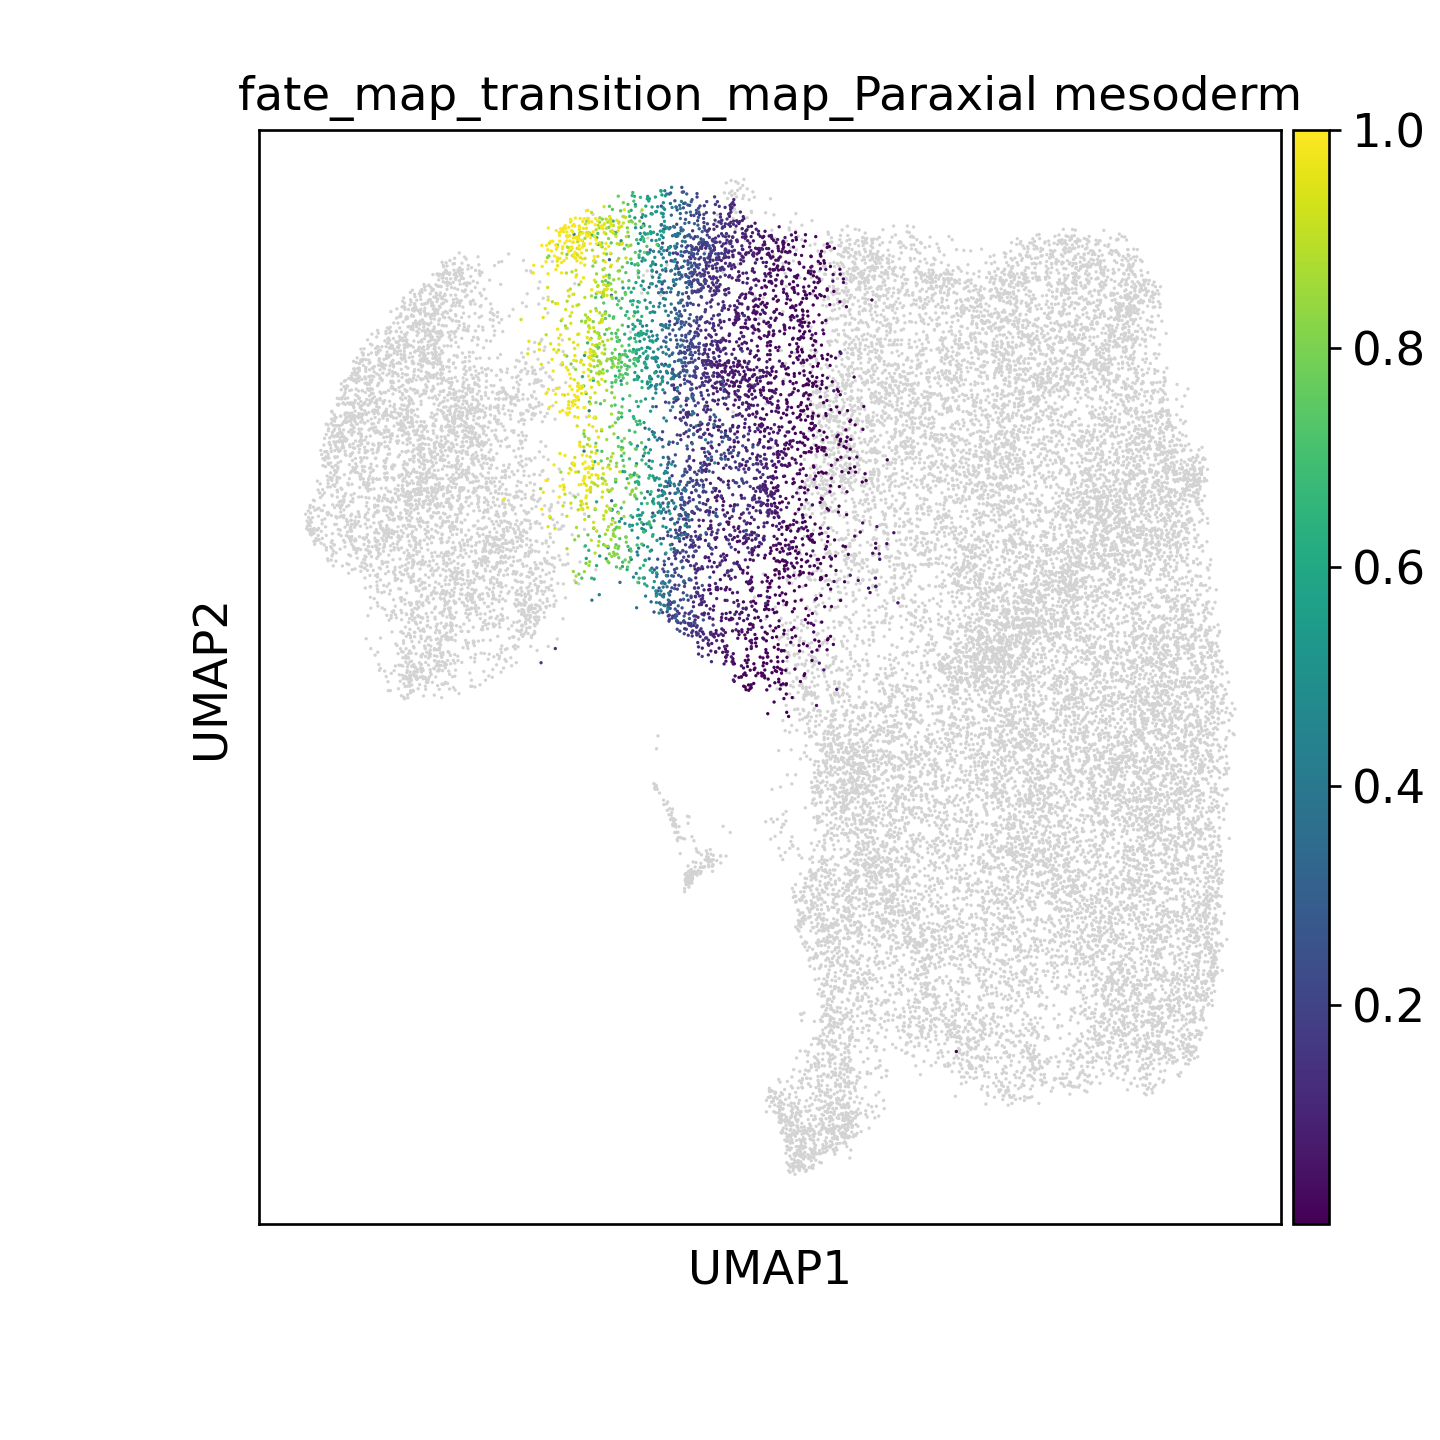

In [80]:
sc.pl.umap(adata,color='diff_trajectory_transition_map_Paraxial mesoderm')
sc.pl.umap(adata,color='progenitor_transition_map_Paraxial mesoderm')
sc.pl.umap(adata,color='fate_map_transition_map_Paraxial mesoderm')

Results saved at adata.obs['fate_map_transition_map_Spinal cord']
Results saved at adata.obs['fate_map_transition_map_Paraxial mesoderm']
Results saved at adata.obs['fate_bias_transition_map_Spinal cord*Paraxial mesoderm']
Results saved at adata.obs[f'progenitor_transition_map_Spinal cord'] and adata.obs[f'diff_trajectory_transition_map_Spinal cord']
Results saved at adata.obs[f'progenitor_transition_map_Paraxial mesoderm'] and adata.obs[f'diff_trajectory_transition_map_Paraxial mesoderm']


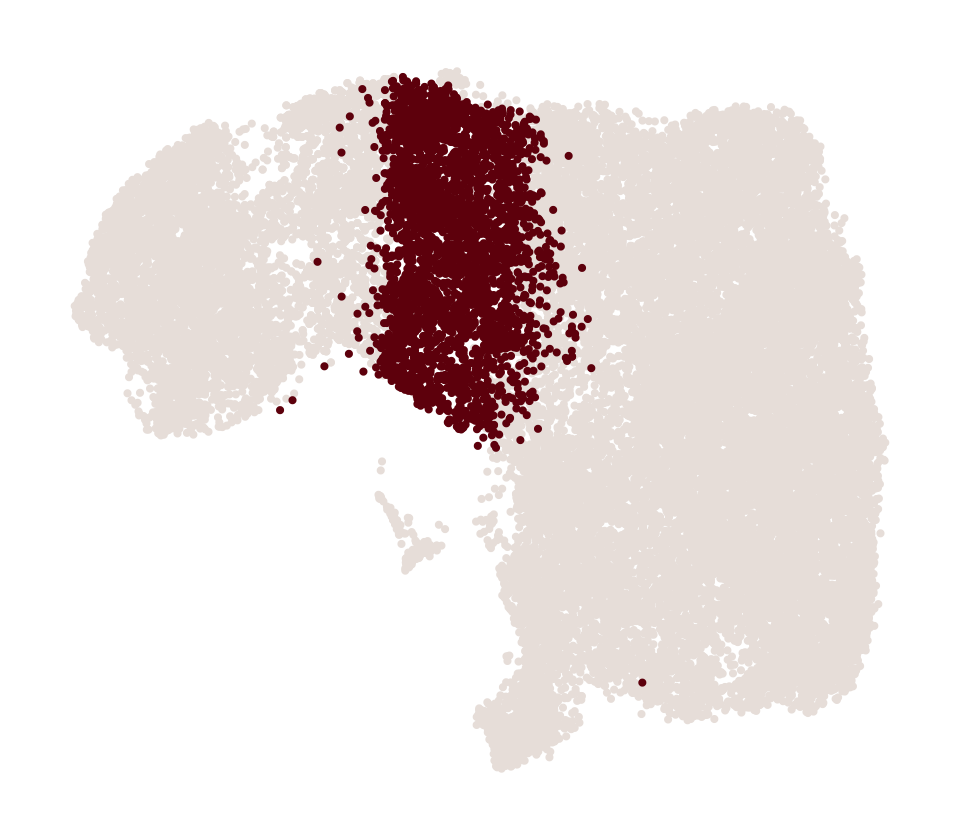

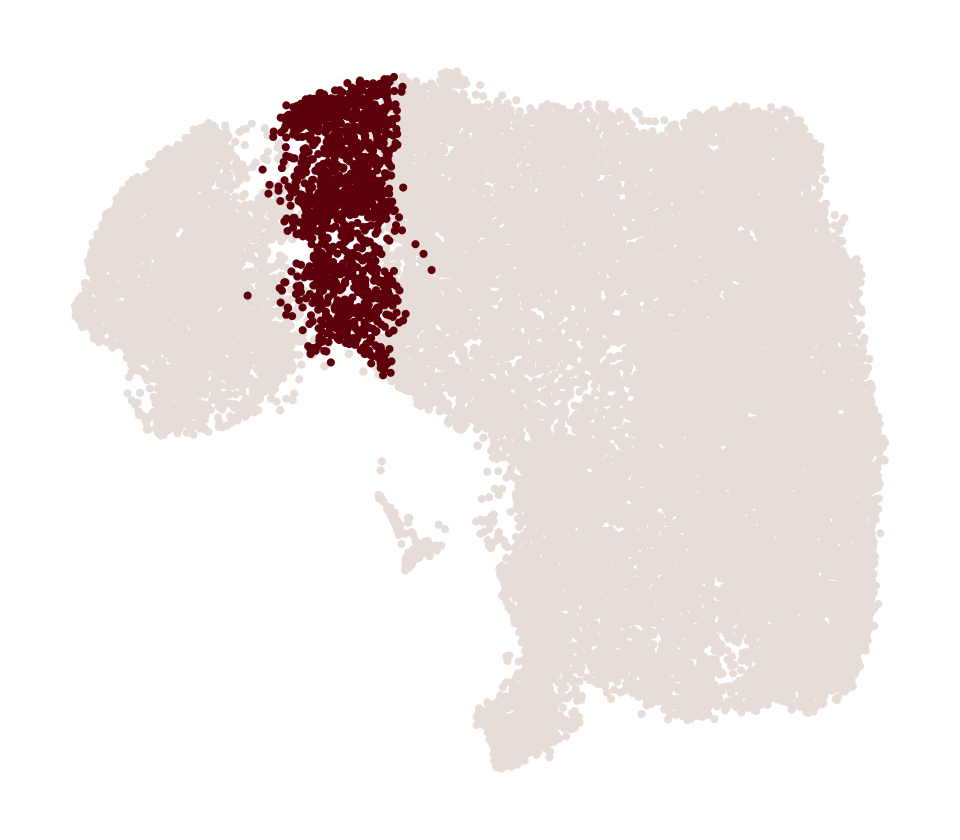

In [85]:
cs.tl.progenitor(
    adata,
    selected_fates=["Spinal cord", "Paraxial mesoderm"],
    source="transition_map",
    map_backward=True,
    bias_threshold_A=0.4,
    bias_threshold_B=0.4,
    sum_fate_prob_thresh=0,
    avoid_target_states=True,
)
cs.pl.progenitor(
    adata, selected_fates=["Spinal cord", "Paraxial mesoderm"], source="transition_map"
)

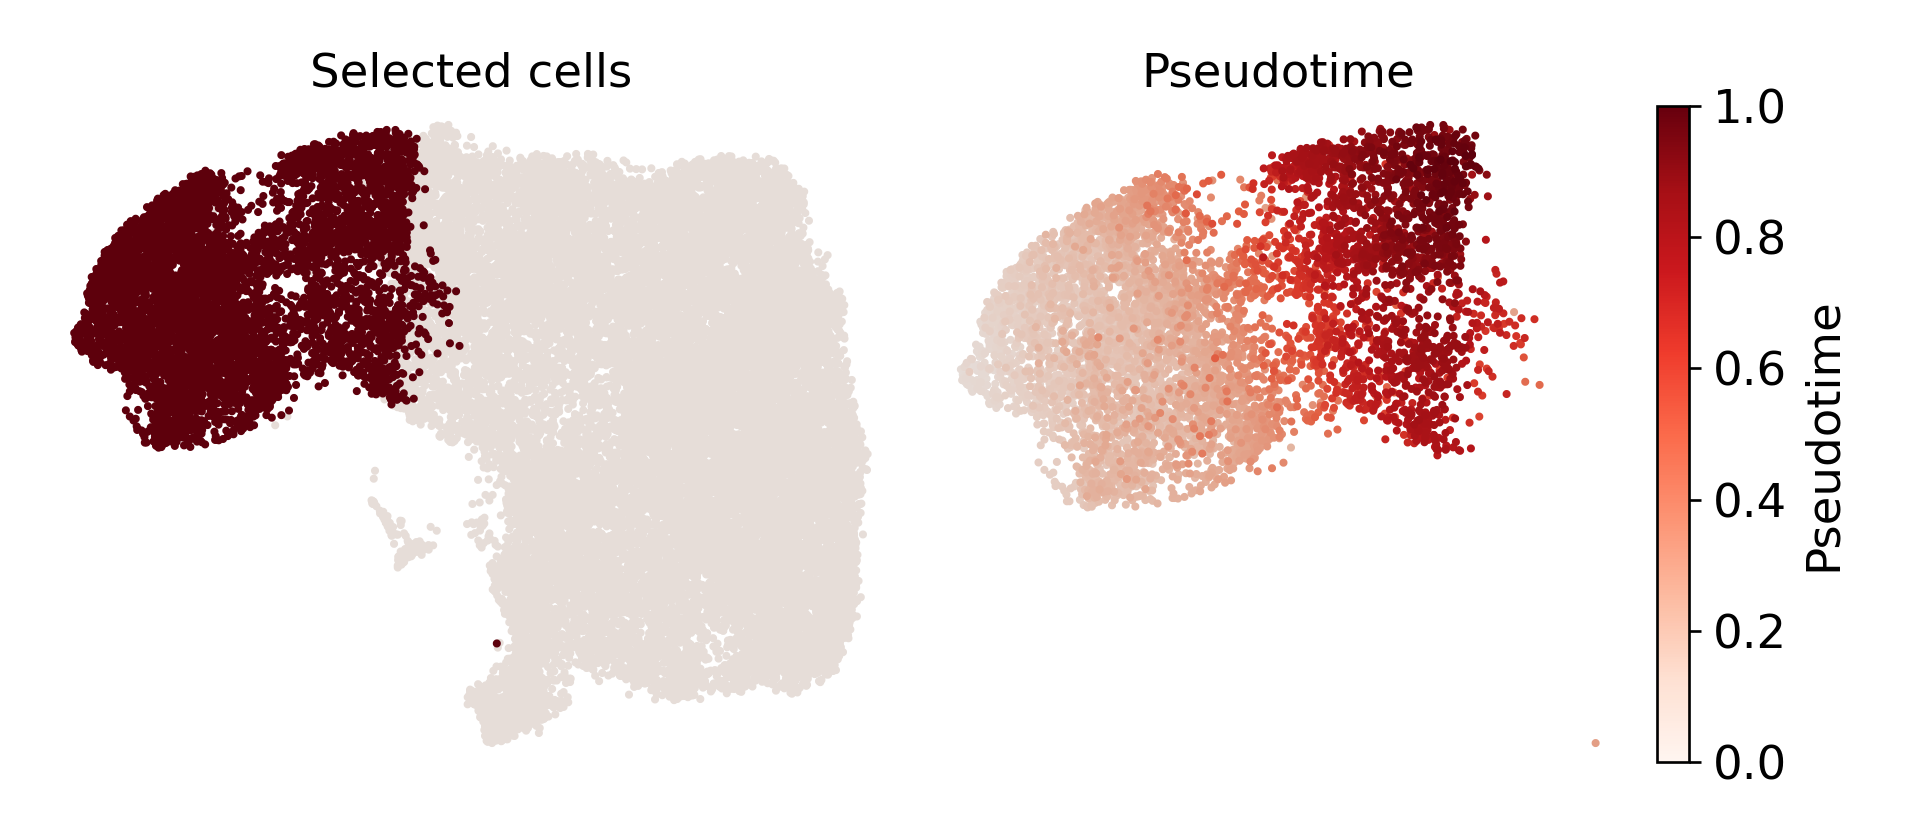

In [69]:
cs.pl.gene_expression_dynamics(
    adata, "Paraxial mesoderm", ['Cdx2','T','Cdx4'], traj_threshold=0.2
)

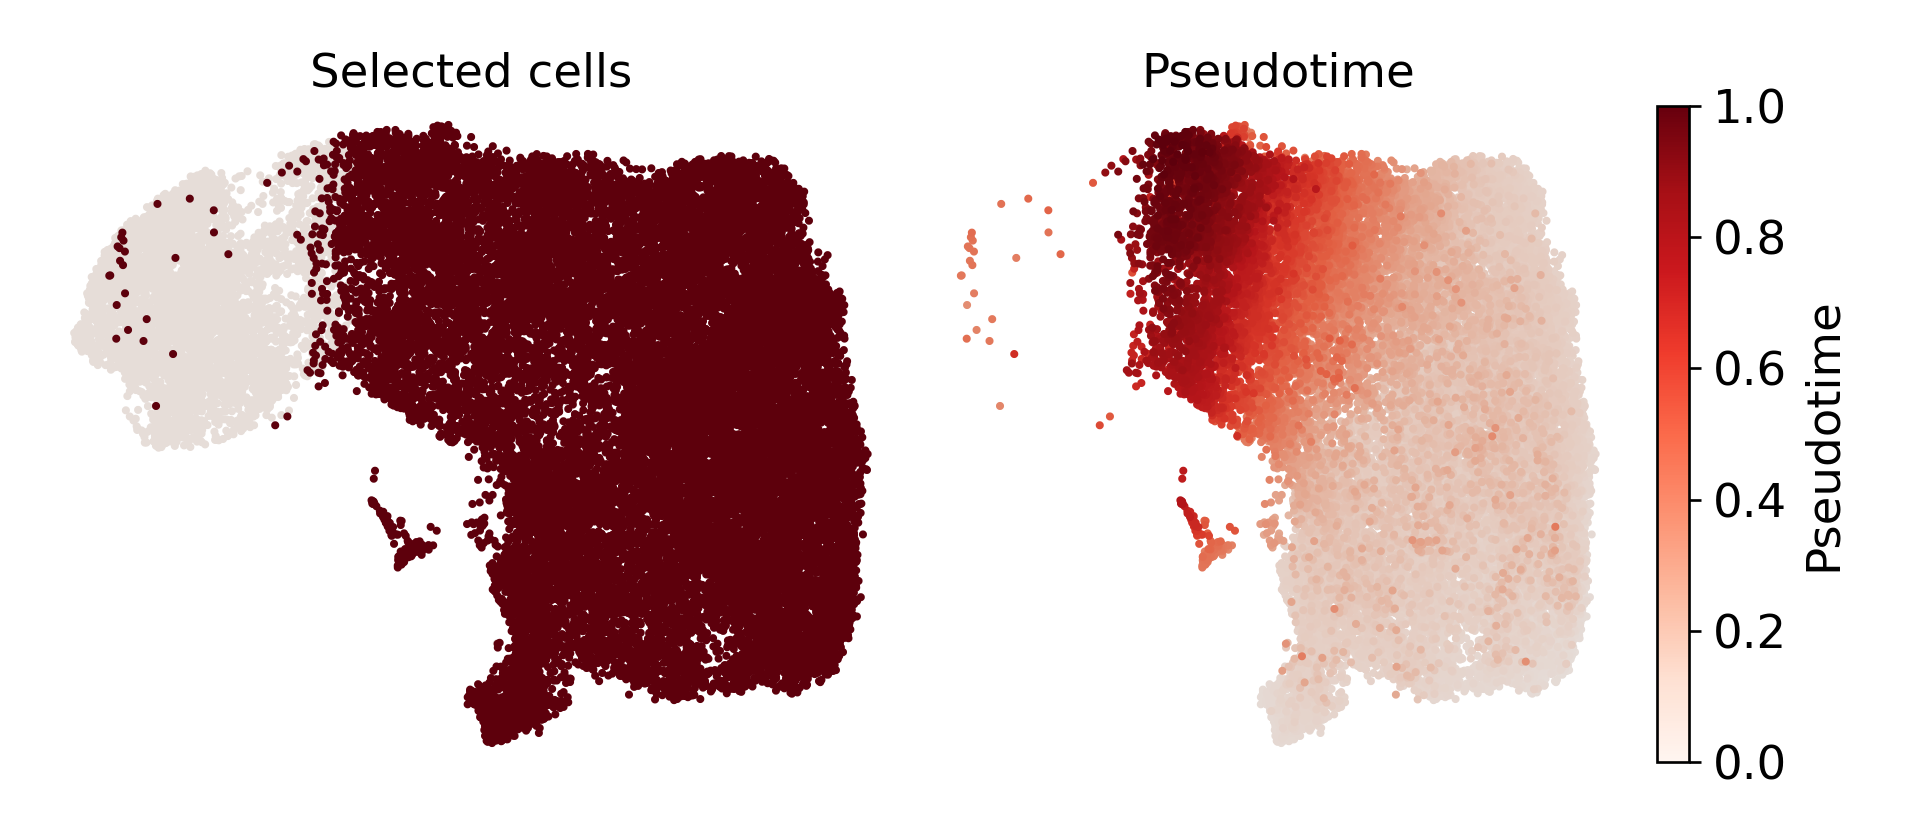

In [70]:
cs.pl.gene_expression_dynamics(
    adata, "Spinal cord", ['Sox2'], traj_threshold=0.2
)

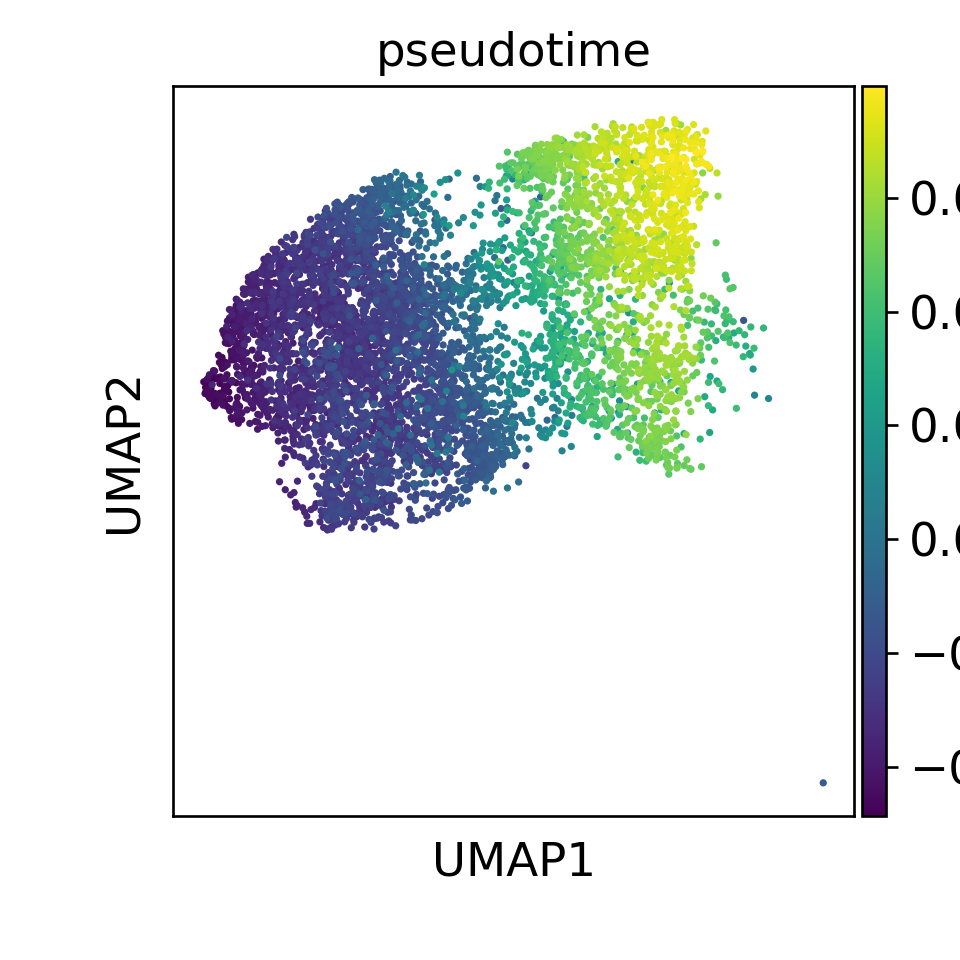

In [71]:
time1 = np.load('/data/jiangjunyao/jupyterlab_root/polyatac/data/cospar_OneTimeClone_t*early*late_fate_trajectory_pseudoTime_Paraxial mesoderm.npy')
adata1= adata[adata.obs['diff_trajectory_transition_map_Paraxial mesoderm']>0.2]
adata1.obs['pseudotime']=time1
sc.pl.umap(adata1,color='pseudotime')
adata1.obs.to_csv('/data/jiangjunyao/polyATAC/multiomi/nmp_fate_pseudotime/pm_pseudotime.csv')

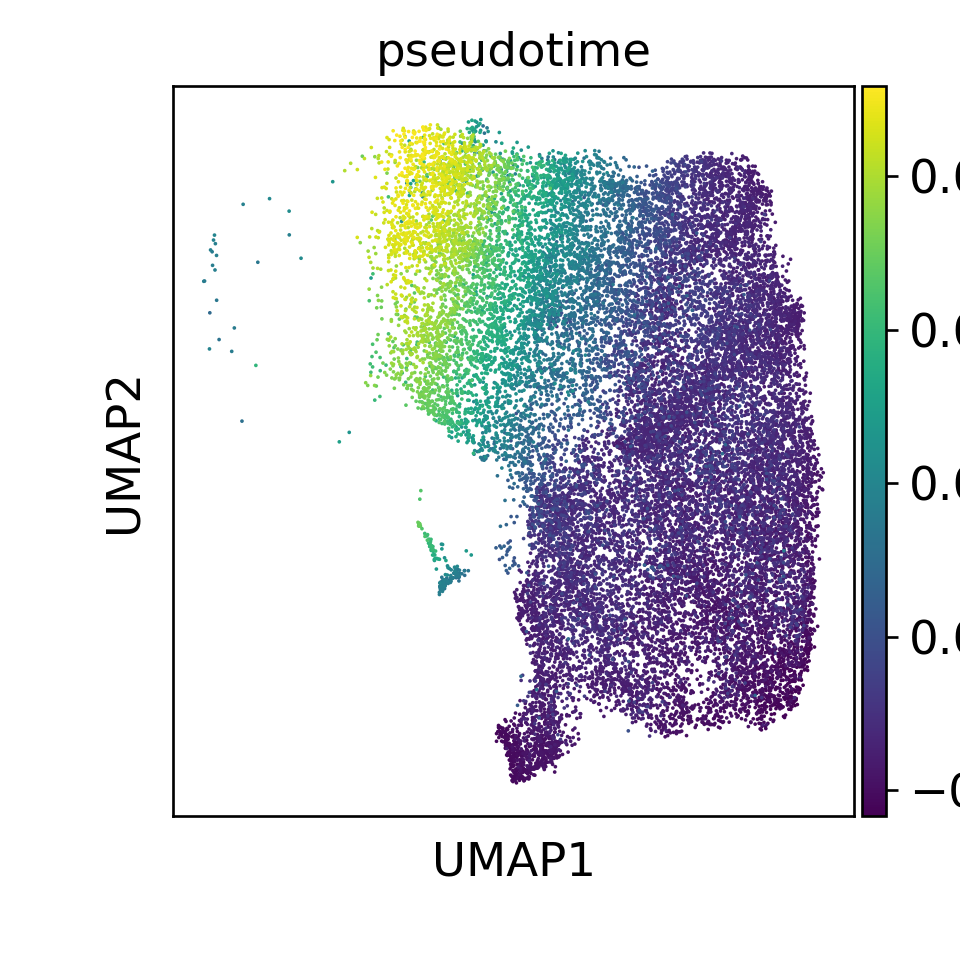

In [72]:
time1 = np.load('/data/jiangjunyao/jupyterlab_root/polyatac/data/cospar_OneTimeClone_t*early*late_fate_trajectory_pseudoTime_Spinal cord.npy')
adata2= adata[adata.obs['diff_trajectory_transition_map_Spinal cord']>0.2]
adata2.obs['pseudotime']=time1
sc.pl.umap(adata2,color='pseudotime')
adata2.obs.to_csv('/data/jiangjunyao/polyATAC/multiomi/nmp_fate_pseudotime/sp_pseudotime.csv')